In [1]:
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import requests

import pandas as pd
import os
import regex as re
import string
import numpy as np
import collections

import contractions
import spacy
#from spacy.tokenizer import Tokenizer
import en_core_web_sm
import nltk
#from nltk.stem import WordNetLemmatizer
from nltk import bigrams, trigrams
#from sklearn.base import TransformerMixin, BaseEstimator
#import sys

#I know this is silly, but whatever. People love it
from wordcloud import WordCloud

/opt/anaconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
#https://hackernoon.com/scraping-amazon-product-information-with-python-and-beautifulsoup-yn4s3tgr
#https://martechwithme.com/schedule-python-scripts-windows-mac/
#https://www.dataquest.io/blog/web-scraping-python-using-beautiful-soup/
#headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

In [3]:
def get_paragraph_text(url, hdr):
    
    try:
        
        req = Request(url,headers=hdr)
        page = urlopen(req)
    
    except:
        
        print("http failed, trying https:")
        
        try:
            url = url.replace('http:', 'https:')
            req = Request(url,headers=hdr)
            page = urlopen(req)
        
        except Exception as e:
            print("substitution of https also failed. Error is {}".format(e))
            
    else:
   
        soup = BeautifulSoup(page, 'html.parser')

        p=soup.find_all('p')
        text = ' '.join(t.get_text() for t in p)

        return text
    

In [4]:

ah_url = 'https://a16z.com/crypto/'
#hdr = {'User-Agent': 'Mozilla/5.0'}
#hdr = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:97.0) Gecko/20100101 Firefox/97.0'}
       #(Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    
    
hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
       'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
       'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
       'Accept-Encoding': 'none',
       'Accept-Language': 'en-US,en;q=0.8',
       'Connection': 'keep-alive'}

# hdr = {'User-Agent':'Mozilla/5.0',
#         'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
#         'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
#         'Accept-Encoding': 'gzip, deflate, sdch',
#         'Accept-Language': 'en-US,en;q=0.8',
#         'Connection': 'keep-alive'}

req = Request(ah_url,headers=hdr)
page = urlopen(req)
soup = BeautifulSoup(page, 'html.parser')
#print(soup.prettify())

In [5]:
#get text from the main AH crypto landing site
main_site_text = get_paragraph_text(ah_url, hdr).lower()
print(main_site_text)

a16z crypto is a venture capital fund that invests in crypto and web3 startups.  the first era of the modern internet (roughly 1990-2005) was about open protocols that were decentralized and community-governed. most of the value accrued to the edges of the network: users and builders. the second era of the internet (roughly 2005-2020) favored siloed, centralized services. most of the value accrued to a handful of large tech companies. we are now beginning the third era of the internet — what many call web3 — which combines the decentralized, community-governed ethos of the first era with the advanced, modern functionality of the second era. this will unlock a new wave of creativity and entrepreneurship. a16z crypto supports our portfolio and the growth of web3 through our research organization; engineering and security teams; legal and regulatory teams; recruiting services; go-to-market expertise; educational content; and more. any investments or portfolio companies mentioned, referred

In [6]:
#get urls for content posts
content_sites = []
content_text = ''
for a in soup.find_all('a', class_="vertical-landing-post vertical-landing-post--no-image", href=True):
    content_sites.append(a['href'])
    
    content_text = content_text + ' ' + contractions.fix(get_paragraph_text(a['href'], hdr).lower())
    
    #content_text.append(get_paragraph_text(a['href'], hdr).lower())
    
    
print(content_sites)
print(content_text)

[]



In [7]:
portfolio_divs = soup.find_all("div", {"class": "company company-type--crypto company--single-company"})

portfolio_websites = []
portfolio_text = ''
failed_websites = []

for tag in portfolio_divs:
    a_tags = tag.find_all("a", href=True)
    
    url = a_tags[0]['href']

    text = get_paragraph_text(url, hdr)
    
    if not isinstance(text, type(None)):
        
        #portfolio_text.append(get_paragraph_text(url, hdr).lower())
        
        portfolio_text = portfolio_text + ' ' + contractions.fix(get_paragraph_text(url, hdr).lower())
        
        portfolio_websites.append(url)
        
    else:
        failed_websites.append(url)




In [8]:
portfolio_websites

[]

In [9]:
failed_websites

[]

In [10]:
portfolio_text

''

In [11]:
##If running for the first time
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')

nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# #fix some spacy lemma issues (e.g., "datum" and "scientist" not resulting in "science")
# nlp.get_pipe('lemmatizer').lookups.get_table("lemma_exc")["noun"]["data"] = ["data"]
# nlp.get_pipe('lemmatizer').lookups.get_table("lemma_exc")["noun"]["scientist"] = ["science"]
# nlp.get_pipe('lemmatizer').lookups.get_table("lemma_exc")["noun"]["artificial intelligence"] = ["ai"]


#change/include additional stop words
customize_stop_words = {'not':False, 
                        '\n\n':True, 
                        '\n\n\n':True}


for w,val in customize_stop_words.items():
    nlp.vocab[w].is_stop = val

In [12]:
#https://www.kaggle.com/balatmak/text-preprocessing-steps-and-universal-pipeline

class TextPreprocessor(object):
    def __init__(self):
        """
        TBD
        """

    def preprocess_df(self, df):
        return df.apply(self._preprocess_text)

    def preprocess_text(self, text):
        doc = nlp(text)
        removed_punct = self._remove_punct(doc)
        removed_stop_words = self._remove_stop_words(removed_punct)

        return self._lemmatize(removed_stop_words)

    def _remove_punct(self, doc):
        return [t for t in doc if t.text not in string.punctuation]

    def _remove_stop_words(self, doc):
        return [t for t in doc if not t.is_stop]

    def _lemmatize(self, doc):
        
        lemma_text = ' '.join([t.lemma_ for t in doc])
        
        return re.sub('\s+',' ',lemma_text)
        
        

In [13]:
#main_site_text = contractions.fix(main_site_text)

#content_text = ' '.join(content_text)


In [14]:
ah_text = main_site_text + ' ' + content_text
ah_text = TextPreprocessor().preprocess_text(ah_text)

portfolio_text = TextPreprocessor().preprocess_text(portfolio_text)

In [15]:
# content_text = ' '.join(content_text)

In [16]:
word_counts = collections.Counter(ah_text.split())
bg = bigrams(ah_text.split())
bigram_counts = collections.Counter(bg)
tg = trigrams(ah_text.split())
trigram_counts = collections.Counter(tg)

word_counts.most_common(50)

[('investment', 12),
 ('a16z', 6),
 ('era', 5),
 ('company', 5),
 ('crypto', 4),
 ('not', 4),
 ('list', 4),
 ('fund', 3),
 ('web3', 3),
 ('internet', 3),
 ('portfolio', 3),
 ('result', 3),
 ('publicly', 3),
 ('modern', 2),
 ('roughly', 2),
 ('2005', 2),
 ('decentralize', 2),
 ('community', 2),
 ('govern', 2),
 ('value', 2),
 ('accrue', 2),
 ('second', 2),
 ('service', 2),
 ('—', 2),
 ('team', 2),
 ('vehicle', 2),
 ('manage', 2),
 ('future', 2),
 ('public', 2),
 ('offering', 2),
 ('trade', 2),
 ('andreessen', 2),
 ('horowitz', 2),
 ('venture', 1),
 ('capital', 1),
 ('invest', 1),
 ('startup', 1),
 ('1990', 1),
 ('open', 1),
 ('protocol', 1),
 ('edge', 1),
 ('network', 1),
 ('user', 1),
 ('builder', 1),
 ('2020', 1),
 ('favor', 1),
 ('siloe', 1),
 ('centralized', 1),
 ('handful', 1),
 ('large', 1)]

In [17]:
bigram_counts.most_common(50)

[(('a16z', 'crypto'), 3),
 (('list', 'investment'), 3),
 (('internet', 'roughly'), 2),
 (('decentralize', 'community'), 2),
 (('community', 'govern'), 2),
 (('value', 'accrue'), 2),
 (('second', 'era'), 2),
 (('era', 'internet'), 2),
 (('portfolio', 'company'), 2),
 (('investment', 'vehicle'), 2),
 (('manage', 'a16z'), 2),
 (('public', 'offering'), 2),
 (('publicly', 'trade'), 2),
 (('andreessen', 'horowitz'), 2),
 (('crypto', 'venture'), 1),
 (('venture', 'capital'), 1),
 (('capital', 'fund'), 1),
 (('fund', 'invest'), 1),
 (('invest', 'crypto'), 1),
 (('crypto', 'web3'), 1),
 (('web3', 'startup'), 1),
 (('startup', 'era'), 1),
 (('era', 'modern'), 1),
 (('modern', 'internet'), 1),
 (('roughly', '1990'), 1),
 (('1990', '2005'), 1),
 (('2005', 'open'), 1),
 (('open', 'protocol'), 1),
 (('protocol', 'decentralize'), 1),
 (('govern', 'value'), 1),
 (('accrue', 'edge'), 1),
 (('edge', 'network'), 1),
 (('network', 'user'), 1),
 (('user', 'builder'), 1),
 (('builder', 'second'), 1),
 (('ro

In [18]:
trigram_counts.most_common(50)

[(('decentralize', 'community', 'govern'), 2),
 (('a16z', 'crypto', 'venture'), 1),
 (('crypto', 'venture', 'capital'), 1),
 (('venture', 'capital', 'fund'), 1),
 (('capital', 'fund', 'invest'), 1),
 (('fund', 'invest', 'crypto'), 1),
 (('invest', 'crypto', 'web3'), 1),
 (('crypto', 'web3', 'startup'), 1),
 (('web3', 'startup', 'era'), 1),
 (('startup', 'era', 'modern'), 1),
 (('era', 'modern', 'internet'), 1),
 (('modern', 'internet', 'roughly'), 1),
 (('internet', 'roughly', '1990'), 1),
 (('roughly', '1990', '2005'), 1),
 (('1990', '2005', 'open'), 1),
 (('2005', 'open', 'protocol'), 1),
 (('open', 'protocol', 'decentralize'), 1),
 (('protocol', 'decentralize', 'community'), 1),
 (('community', 'govern', 'value'), 1),
 (('govern', 'value', 'accrue'), 1),
 (('value', 'accrue', 'edge'), 1),
 (('accrue', 'edge', 'network'), 1),
 (('edge', 'network', 'user'), 1),
 (('network', 'user', 'builder'), 1),
 (('user', 'builder', 'second'), 1),
 (('builder', 'second', 'era'), 1),
 (('second', '

In [19]:
word_counts = collections.Counter(portfolio_text.split())
bg = bigrams(portfolio_text.split())
bigram_counts = collections.Counter(bg)
tg = trigrams(portfolio_text.split())
trigram_counts = collections.Counter(tg)

word_counts.most_common(50)

[]

In [20]:
bigram_counts.most_common(50)

[]

In [21]:
trigram_counts.most_common(50)

[]

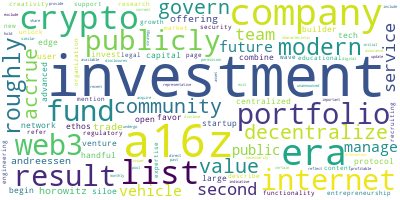

In [22]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(ah_text)# Visualize the word cloud
wordcloud.to_image()

In [23]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(portfolio_text)# Visualize the word cloud
wordcloud.to_image()

ValueError: We need at least 1 word to plot a word cloud, got 0.